# Financial Analysis

In this data project we will focus on exploratory data analysis of stock prices. We'll focus on bank stocks and see how they progressed throughout the financial crisis all the way to early 2016. We will get data from Yahoo Finance API using pandas datareader library.

In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore")

print("Libraries imported")

Libraries imported


We need to get data using pandas datareader. We will get stock information for the following banks:

1. Bank of America
2. CitiGroup
3. Goldman Sachs
4. JPMorgan Chase
5. Morgan Stanley
6. Wells Fargo

In [2]:
from pandas_datareader import data, wb

Functions from `pandas_datareader.data` and `pandas_datareader.wb` extract data from various Internet sources into a pandas DataFrame.

<b>We would like all available data from `01/01/2006` until `01/01/2016`.</b>

In [3]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

<b>Initialize datareader to grab info on the stock.</b>

In [4]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

<b>Create a list of the ticker symbols (as strings) in alphabetical order.  We would like to see `Bank of America`, `CitiGroup`, `Goldman Sachs`, `JPMorgan Chase`, `Morgan Stanley`  and `Wells Fargo` index. </b>

In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

<b>Concatenate bank dataframes into single data and set the keys arugment to `tickers` list.</b>

In [6]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [7]:
bank_stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  34.811729   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.442013   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.486385   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.434616   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.456806   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  37.170383  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  37.195881  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  37.297882  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  37.336124  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  37.731342  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.324865  
2006-01-04  31.530001  10870000.0  20.089125  
2006-01-05  31.495001  10158000.0  20.066822  
2006-01-06  31.680000   8403800.0  20.184694  
2006-01-09  31.674999   5619600.0  20.181515  

[5 rows x 36 columns]

<b>Set the column name levels </b>

In [8]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [9]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.811729  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.442013  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.486385  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.434616  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.456806  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.170383  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.195881  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.297882  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.336124  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.731342  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.324865  
2006-01-04   31.799999  31.530001  10870000.0  20.089125  
2006-01-05   31.500000  31.495001  10158000.0  20.066822  
2006-01-06   31.580000  31.680000   8403800.0  20.184694  
2006-01-09   31.674999  31.674999   5619600.0  20.181515  

[5 rows x 36 columns]

Dataset is ready for Exploratoray Data Analysis

<b>Maximum `Close` price for each bank's stock throughout the time period</b>

The xs() function is used to get cross-section from the Series/DataFrame. This method takes a key argument to select data at a particular level of a MultiIndex. For more <a href="https://www.w3resource.com/pandas/series/series-xs.php#:~:text=Cross%2Dsection%20from%20the%20Series,particular%20level%20of%20a%20MultiIndex.&text=Label%20contained%20in%20the%20index%2C%20or%20partially%20in%20a%20MultiIndex.&text=Axis%20to%20retrieve%20cross%2Dsection%20on">info</a>

In [10]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

<b>Calculate `returns` for each bank's stock. It is defined by :</b>
 $$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

Pandas dataframe.pct_change() function calculates the percentage change between the current and a prior element. This function by default calculates the percentage change from the immediately previous row. For more <a href="https://www.geeksforgeeks.org/python-pandas-dataframe-pct_change/#:~:text=pct_change()%20function%20calculates%20the,in%20the%20time%2Dseries%20data">info</a>

In [11]:
#Create a blank dataframe
returns = pd.DataFrame()

#Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


<b>Create a pairplot of the `returns` dataframe </b>

In [12]:
returns[1:]

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.000507,-0.000789
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


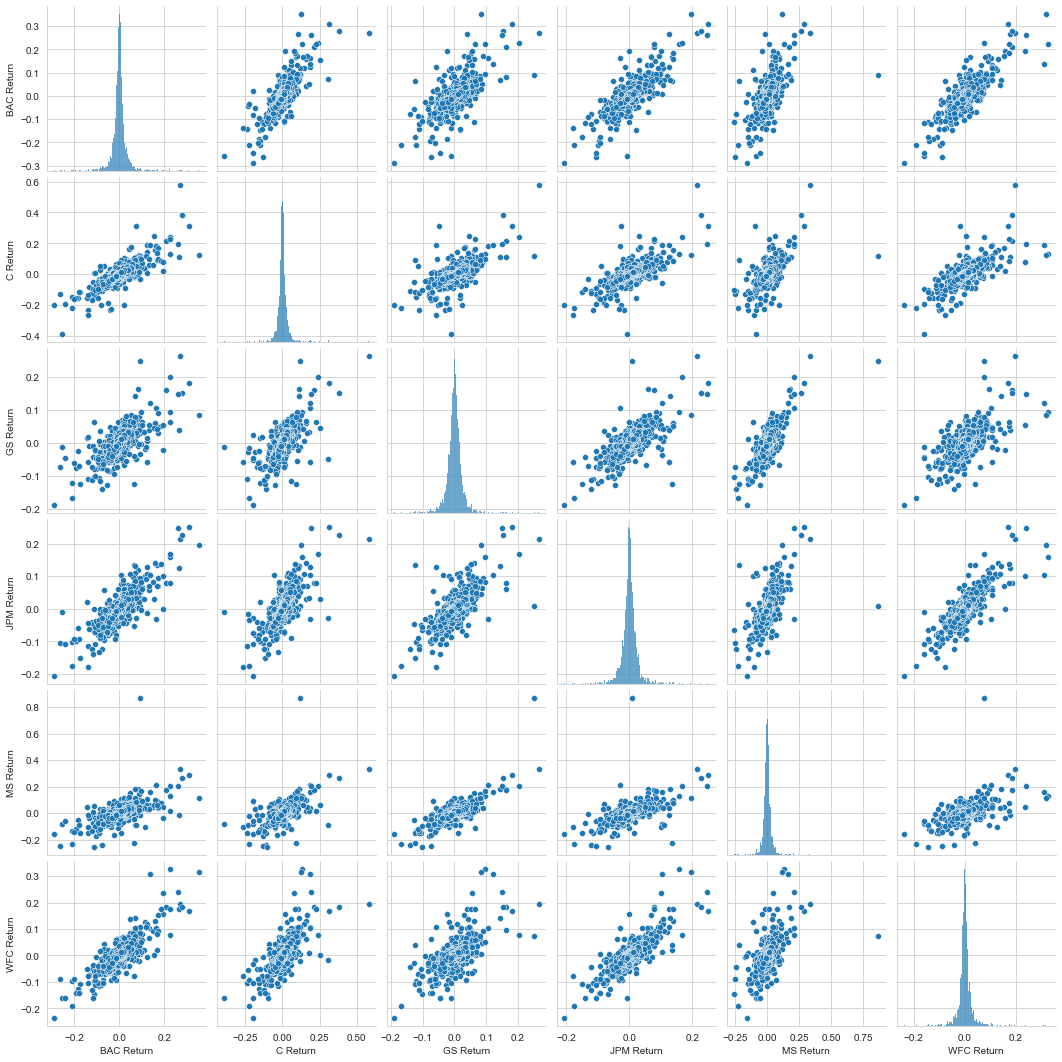

In [13]:
#exclude first row because it contains null values
sns.pairplot(returns[1:])

From above pairplot, all the stocks look relatively normal and there seems correlation between theme except there is a weird straight line in `C Return` block. And if you check the history `CitiGroup` faced a huge stock crash back then.

<b>`Dates` on which each bank stock had `best` and `worst` single day returns</b>

In [14]:
#Worst returns drop
returns.min()

BAC Return   -0.289694
C Return     -0.390244
GS Return    -0.189596
JPM Return   -0.207274
MS Return    -0.258929
WFC Return   -0.238223
dtype: float64

In [15]:
#Worst returns drop dates
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [16]:
#Best returns drop
returns.max() 

BAC Return    0.352691
C Return      0.578249
GS Return     0.264678
JPM Return    0.250967
MS Return     0.869835
WFC Return    0.327645
dtype: float64

In [17]:
#Best returns drop dates
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

It is observed that worst drops occured on 20th January, and if you google it it was actually Barack Obama's inaugration day. It might be becuase of some political changes.
But on the other hand best drop for JP Morgan is on 21st January same year, so this might not be related to political changes, could be some co-incident as well. As you stock market is a weird place actually.

<b>Standard deviation of the returns </b>

In [18]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

Standard deviation helps in telling which stock is the riskiest over the entire time period. If `std` is large for the returns then stocks might probably going up and down a lot on the other hand if `std` is low then returns must be steady. Thus `Citigroup` Stock prices are quite risky as it shows highest standard deviation.

<b>Returns for `Year` 2015 </b>

In [19]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In Year 2015, all companies has similar risk profile, as their standard deviations are almost similar but Morgan Stanley and Bank of America is at highest risks.

<b>Create a distplot of `2015` returns for Morgan Stanley</b>

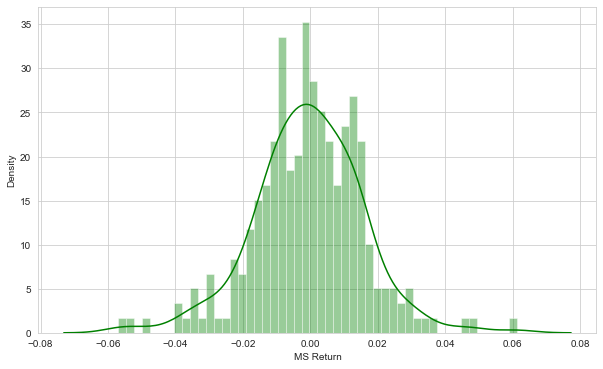

In [20]:
plt.figure(figsize=(10,6))
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=50)

Form above graph, it is looking pretty stable distribution. Its just deviated 0.06 from the average.

<b>Create a distplot of `2008` returns for Citigroup</b>

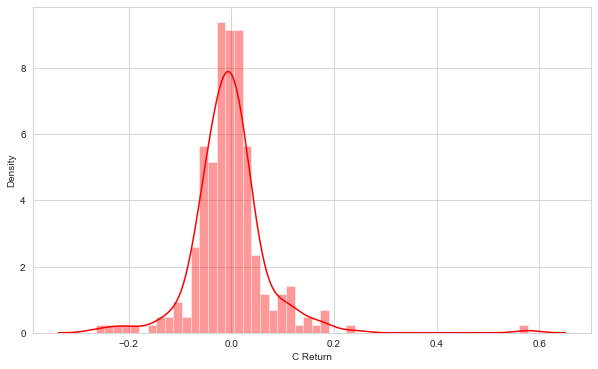

In [21]:
plt.figure(figsize=(10,6))
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=50)

From above plot, standard deviation is quite more stretched out at 0.6 which is 10 times from the previous plot. There are quite a few outliers here.

<b>Create a line plot showing `Close` price for each bank for the entire index of time</b>

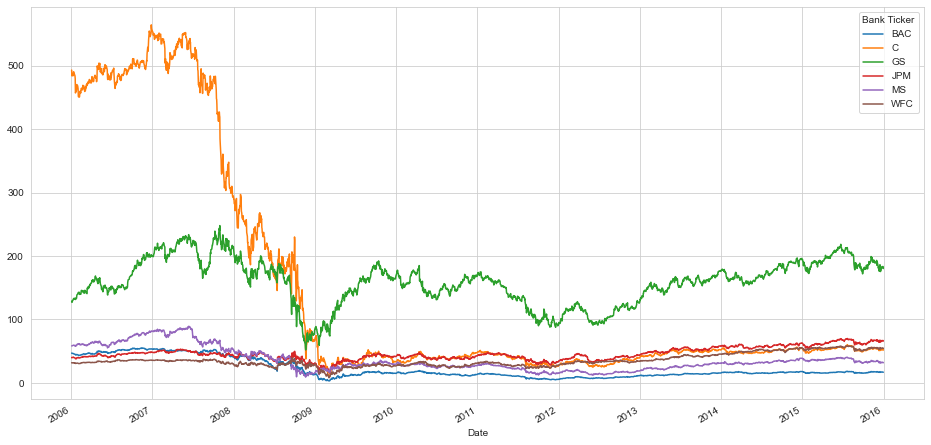

In [22]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(16,8))

Above plot shows the crash of `Citigroup` at 2008 which is great recession and also for `Goldman Sachs` which went up after the recession.

We can do same thing with cufflinks which is even more interactive than pandas plot feature.

<b>Plotly</b> is an open-source and browser-based graphing library which facilitates interactive plotting. <b>Cufflinks</b> is another library that connects the Pandas data frame with Plotly enabling users to create visualizations directly from Pandas. The library binds the power of Plotly with the flexibility of Pandas for easy plotting.

In [23]:
import plotly
import cufflinks as cf
cf.go_offline()

In [24]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

From above plot, we can see some interactive visualizations. It is more helpful in visualizing stocks data and getting insights from it. We can also save this plot.

<b>Plot the rolling 30 day average against the `Close` Price for Bank Of America's stock for the year 2008 (Moving Average plot)</b>

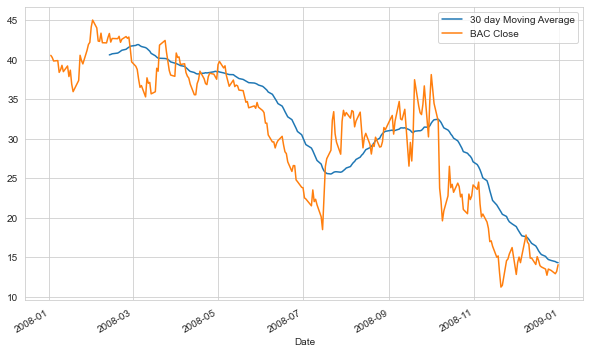

In [25]:
plt.figure(figsize=(10,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Moving Average')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

Above plot shows the general trend of stocks for Bank of America along with the actual BAC stocks.

<b>Create a `heatmap` of the correlation between the stocks `Close` Price</b>

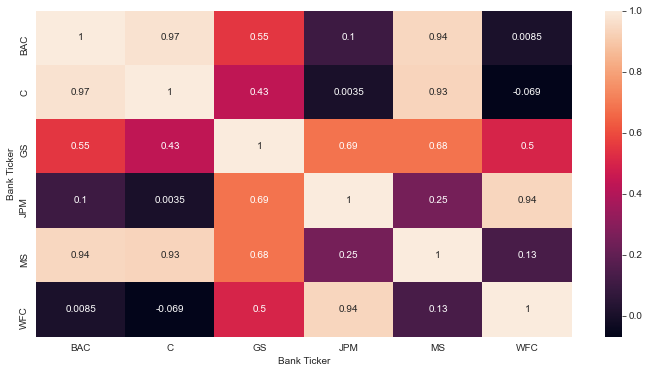

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

We can also use `clustermap` for better understanding.

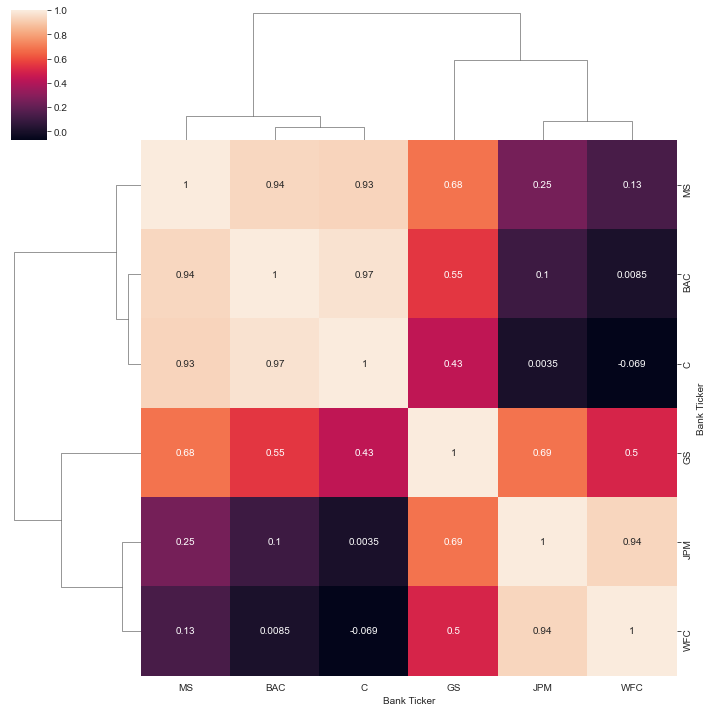

In [27]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

From the above plt, it is depicted that there is correlations between Citigroup, Morgan Stanley and Bank of America and rest has correlations with each other.

<b>Heatmaps using Plotly</b>

In [28]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

This is more interactive than the seaborn's feature.

<b>Create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016 </b>

In [29]:
bac_cp=BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01']
bac_cp.iplot(kind='candle')

Above plot is a financial analysis plot which basically tells whether stock went up or day on a particular day based on colors. Here green refers to increasing of stocks and red refers is decreasing of stocks.

The `candlestick chart` is a style of financial chart describing open, high, low and close for a given x coordinate (most likely time). The boxes represent the spread between the open and close values and the lines represent the spread between the low and high values. Sample points where the close value is higher (lower) then the open value are called increasing (decreasing). By default, increasing candles are drawn in green whereas decreasing are drawn in red.

<b>Create a Simple Moving Averages plot of Morgan Stanley for the year 2015 </b>

In [30]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

A `moving average`, also called a rolling or running average, is used to analyze the time-series data by calculating averages of different subsets of the complete dataset. Since it involves taking the average of the dataset over time, it is also called a moving mean (MM) or rolling mean.<br>

A few examples of time series data can be stock prices, weather reports, air quality, gross domestic product, employment, etc.
In general, the moving average smoothens the data. For more <a href="https://www.datacamp.com/community/tutorials/moving-averages-in-pandas">info</a>

<b>Create a Bollinger Band Plot for Bank of America for the year 2015</b>

In [31]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

`Bollinger Bands` shows the levels of different highs and lows that a security price has reached in a particular duration.<br>

Bollinger Bands encapsulate the price movement of a stock. It provides relative boundaries of highs and lows. The crux of the Bollinger Band indicator is based on a moving average that defines the intermediate-term "trend" based on the time frame you are viewing. For more <a href="https://github.com/Abhay64/Bollinger-Bands">info</a>

<b>As `pyplot` plots are not compatible with github pages, some of graphs might not show in this notebook. Thus to have better view for this, we can use NBviewer of Jupyter Notebook which displays every category of plots and graphs.<br>
View from <a href="https://nbviewer.jupyter.org/github/Sahil17s/Data-Analysis-and-Visualizations/blob/master/Finance/Stock%20market%20data.ipynb">here</a>. </b>